# MPI-CBG Puzzle

**We have 2 types of images with points, the points are of two types, type 1 and type 2. We are required to train a model which can classify the points in the images to type 1 or type 2**

In [110]:
!pip install opencv-python

**Importing all the necessary libraries and frameworks**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

**Path to the datasets in my machine**

In [53]:
datadir=r"C:\Users\Prathvik G S\Desktop\data\train"
catagories=["Type1","Type2"]

**Note that we can grayscale the image (reducing rbg) so as to reduce the size of data by 3 fold if the accuracy of the output isn't affected, or in other words we can grasycale the images if we don't loose any data from that.**\
**A sample image from the training set**

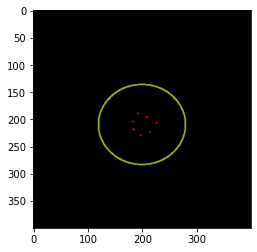

In [54]:
for category in catagories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

**Size of the array storing the pixel values**

In [55]:
print(img_array.shape)

(400, 400, 3)


We can Normalise the images so as to contain the same number of pixels but here all the images have a size of $400x400$ so no need of normalising them in this case

**Creating the training data**

In [56]:
training_data=[]

def create_training_data():
    for category in catagories:
        path=os.path.join(datadir,category)
        class_num=catagories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            training_data.append([img_array,class_num])
create_training_data()

**The number of labeled data set is 2000 where 1000 are of type 1 and type 2 each**

In [57]:
print(len(training_data))

2000


**We randomly shuffle the dataset because when we created the data set, the first 1000 images are of type 1 and remaining are of type 2, so we shuffle them to make it random**

In [58]:
import random
random.shuffle(training_data)

In [59]:
x=[]
y=[]

Separating x and y

In [60]:
for features,label in training_data:
    x.append(features)
    y.append(label)

In [61]:
x=np.array(x)

In [62]:
y=np.array(y)
y=y.reshape(-1,1)

**$X$ has the training set, each image is now a $400*400*3$ array (a 3d array with pixel values for RBG colors) and y has its labels, $0$ corresponds to type-$1$ and $1$ corresponds to type-$2$**

In [63]:
x.shape

(2000, 400, 400, 3)

In [64]:
y.shape

(2000, 1)

**Before training the data, we split the data into 2 parts, one is the training set and the other the test set to check the accuracy of our model on unseen data. Here I split the data in the following manner**\

Training set- $60\%$, which corresponds to 1200 images\
The test set- $40\%$, which corresponds to 800 images\
\
Once we get a good accuracy we can divide the data into 80:20 and finally we can use the whole data to train the model.Then use the model to make predictions for new data whose output is unknown to us

# Using 60% of the data to train and 40% to test

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

**Building the model, we use convolutional neural network to build our model**

In [70]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[400, 400, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Summary of our **Neural Network Model**

In [77]:
cnn.summary()
print("no. of layers")
print(len(cnn.layers))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 199, 199, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 307328)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

**Training the model with our Data**\
We can play around with the batch size and no. of epochs to get the optimal value

In [72]:
cnn.fit(X_train, y_train,batch_size = 25, epochs = 2)

Epoch 1/2
48/48 [==============================] - 119s 2s/step - loss: 17.2773 - accuracy: 0.8650
Epoch 2/2
48/48 [==============================] - 115s 2s/step - loss: 0.0117 - accuracy: 0.9967


**predicting the type for the test set**

In [73]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

25/25 [==============================] - 13s 533ms/step


**The confusion matrix and the accuracy of our model on the test set**

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is")
print(cm)
print("The accuracy is")
print(accuracy_score(y_test, y_pred)*100)

Confusion Matrix is
[[379   1]
 [  3 417]]
The accuracy is
99.5


The model has an accuracy of  **99.5%** . We can see through the confusion matrix that **796** out of **800** test data were classified correctly and only **4** test images were misclassified, hence the model is neither overfitted nor underfitted

# Training the model with 80% of the data
Here we use the same model 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
cnn.fit(X_train, y_train,batch_size = 32, epochs = 2)

Epoch 1/2
50/50 [==============================] - 123s 2s/step - loss: 0.0233 - accuracy: 0.9925
Epoch 2/2
50/50 [==============================] - 119s 2s/step - loss: 0.0011 - accuracy: 0.9994


**Confusion matrix and accuracy of the model on the test set**

In [23]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

13/13 [==============================] - 6s 412ms/step
[[201   0]
 [  2 197]]
99.5


Only **2** out of the **400** test data are predicted wrongly,thus providing an accuracy of **99.5%**. This shows that our data isn't overfitted as it performs well on an unseen dataset of 400

# Using 100% of the training data to classify the image in the test folder

Using all the data to train the model and classify the images in the test folder

In [79]:
cnn.fit(x,y, batch_size=25, epochs=2)

Epoch 1/2
80/80 [==============================] - 177s 2s/step - loss: 0.0102 - accuracy: 0.9960
Epoch 2/2
80/80 [==============================] - 157s 2s/step - loss: 0.0013 - accuracy: 1.0000


creating the Test dataset to be classified

In [80]:
datadir=r"C:\Users\Prathvik G S\Desktop\data\test"
catagories=["TestSet"]
test_data=[]

def create_test_data():
    for category in catagories:
        path=os.path.join(datadir,category)
        class_num=catagories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            test_data.append(img_array)

In [81]:
create_test_data()

We have 20 images with points to be classified 

In [82]:
test_data=np.array(test_data)
test_data.shape

(20, 400, 400, 3)

In [104]:
y_pred = cnn.predict(test_data)
y_pred=y_pred>0.5

1/1 [==============================] - 0s 376ms/step


displaying the images with type

Type 1


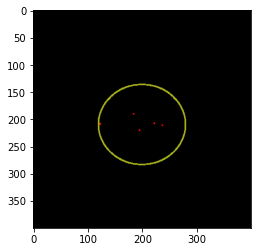

Type 1


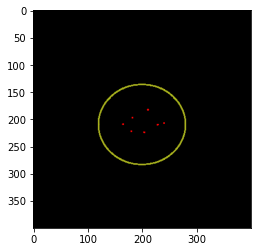

Type 1


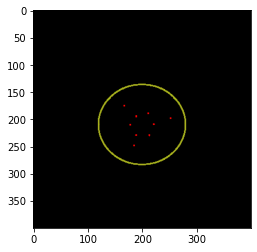

Type 2


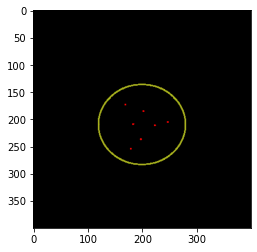

In [106]:

for i in range(4):
    if(y_pred[i]==1):
        print("Type 2")
        plt.imshow(test_data[i])
        plt.show()
    else:
        print("Type 1")
        plt.imshow(test_data[i])
        plt.show()
        

In [108]:
print(y_pred*1)

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [109]:
y_pred=y_pred>0.5
y_pred=y_pred.reshape(1,len(y_pred))
print("Type1-18, Type2-2")
print(y_pred*1)

Type1-18, Type2-2
[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


**Most of the images belong to type 1**

# Reducing the data by removing color and checking the outcome

In [31]:
datadir=r"C:\Users\Prathvik G S\Desktop\data\train"
catagories=["Type1","Type2"]
training_data=[]

def create_training_data():
    for category in catagories:
        path=os.path.join(datadir,category)
        class_num=catagories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            training_data.append([img_array,class_num])
create_training_data()

In [32]:
print(len(training_data))


2000


In [33]:
import random
random.shuffle(training_data)
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x)
y=np.array(y)
y=y.reshape(-1,1)
x.shape

(2000, 400, 400)

In [34]:
datadir=r"C:\Users\Prathvik G S\Desktop\data\test"
catagories=["TestSet"]
test_data=[]

def create_test_data():
    for category in catagories:
        path=os.path.join(datadir,category)
        class_num=catagories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            test_data.append(img_array)
            
create_test_data()
test_data=np.array(test_data)
test_data.shape

(20, 400, 400)

In [35]:
cnn2 = tf.keras.models.Sequential()
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[400, 400, 1]))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
cnn2.fit(X_train,y_train, batch_size=25, epochs=4)

Epoch 1/4
64/64 [==============================] - 139s 2s/step - loss: 0.6932 - accuracy: 0.4963
Epoch 2/4
64/64 [==============================] - 152s 2s/step - loss: 0.6932 - accuracy: 0.5025
Epoch 3/4
64/64 [==============================] - 137s 2s/step - loss: 0.6932 - accuracy: 0.4875
Epoch 4/4
64/64 [==============================] - 135s 2s/step - loss: 0.6932 - accuracy: 0.5025


In [49]:
y_pred2 = cnn2.predict(test_data)
y_pred2 = (y_pred2 > 0.5)

1/1 [==============================] - 0s 298ms/step


In [50]:
y_pred = cnn2.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

13/13 [==============================] - 5s 395ms/step
[[  0 204]
 [  0 196]]
49.0


**We can see through the confusion matrix and the accuracy that it is better we keep the colours as even after 4 epochs (compared to 2 epochs with colors) we are unable to get an accuracy of more than 50%, so it is better not to remove colors from the images.**

***Hence We built the required model with a good accuracy***